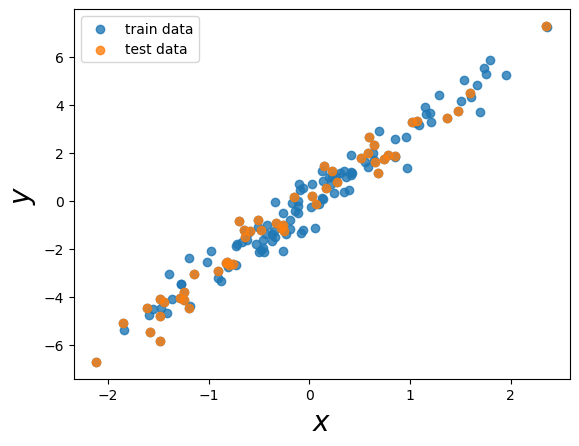

In [21]:
# https://dreamer-uma.com/beginner-how-to-use-pytorch/
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

# 標準正規分布に従う入力
data = np.random.randn(200, 1)
# y=3xにノイズを追加した出力
label = 3*data + np.random.randn(200, 1)*0.5

#separate into training/test data
x_train = data[:150, :]
y_train = label[:150, :]
x_test = data[:50, :]
y_test = label[:50, :]

# convert to Tensor (datatype:float32)
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()
x_test = torch.tensor(x_test).float()
y_test = torch.tensor(y_test).float()

#visualize the data
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, alpha=0.8, label='train data')
ax.scatter(x_test, y_test, alpha=0.8, label='test data')
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.legend()
plt.show()

In [22]:
def model(x):
    return w*x + b

def loss_func(output, y):
    loss = ((output-y)**2).mean()
    return loss

w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
lr = 0.01
num_epoch = 1000

In [23]:
train_loss_list = []
for epoch in range(num_epoch):
    # 予測
    output = model(x_train)
    # 損失関数を計算
    loss = loss_func(output, y_train)
    # 勾配を計算
    loss.backward()

    with torch.no_grad():
        # パラメータ更新
        w -= lr*w.grad
        b -= lr*b.grad
        # 勾配の初期化
        w.grad.zero_()
        b.grad.zero_()

    # lossを記録
    if (epoch%5==0):
        train_loss_list.append(loss)
        print(f'【EPOCH {epoch}】 loss : {loss:.5f}')

【EPOCH 0】 loss : 8.13115
【EPOCH 5】 loss : 6.82702
【EPOCH 10】 loss : 5.74066
【EPOCH 15】 loss : 4.83559
【EPOCH 20】 loss : 4.08145
【EPOCH 25】 loss : 3.45298
【EPOCH 30】 loss : 2.92918
【EPOCH 35】 loss : 2.49256
【EPOCH 40】 loss : 2.12857
【EPOCH 45】 loss : 1.82508
【EPOCH 50】 loss : 1.57201
【EPOCH 55】 loss : 1.36096
【EPOCH 60】 loss : 1.18493
【EPOCH 65】 loss : 1.03809
【EPOCH 70】 loss : 0.91559
【EPOCH 75】 loss : 0.81338
【EPOCH 80】 loss : 0.72810
【EPOCH 85】 loss : 0.65693
【EPOCH 90】 loss : 0.59753
【EPOCH 95】 loss : 0.54795
【EPOCH 100】 loss : 0.50657
【EPOCH 105】 loss : 0.47202
【EPOCH 110】 loss : 0.44317
【EPOCH 115】 loss : 0.41908
【EPOCH 120】 loss : 0.39897
【EPOCH 125】 loss : 0.38217
【EPOCH 130】 loss : 0.36814
【EPOCH 135】 loss : 0.35642
【EPOCH 140】 loss : 0.34663
【EPOCH 145】 loss : 0.33845
【EPOCH 150】 loss : 0.33162
【EPOCH 155】 loss : 0.32591
【EPOCH 160】 loss : 0.32113
【EPOCH 165】 loss : 0.31715
【EPOCH 170】 loss : 0.31382
【EPOCH 175】 loss : 0.31103
【EPOCH 180】 loss : 0.30870
【EPOCH 185】 loss : 0.30

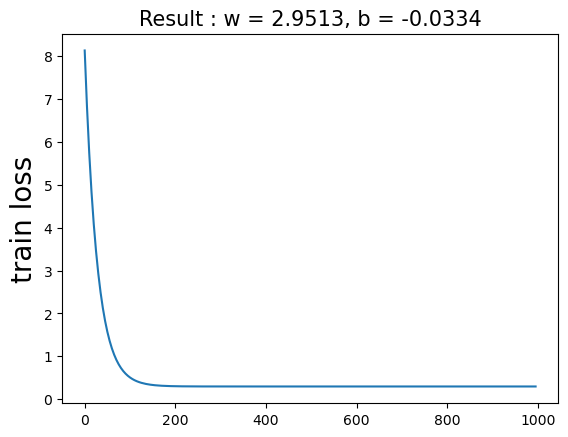

In [28]:
# Predicted w,b
with torch.no_grad():
    fig, ax = plt.subplots()
    epoch_list = np.arange(0, 1000, 5)
    ax.plot(epoch_list, train_loss_list)
    ax.set_title(f'Result : w = {w:.4f}, b = {b:.4f}', fontsize=15)
    ax.set_ylabel('train loss', fontsize=20)
    plt.show()

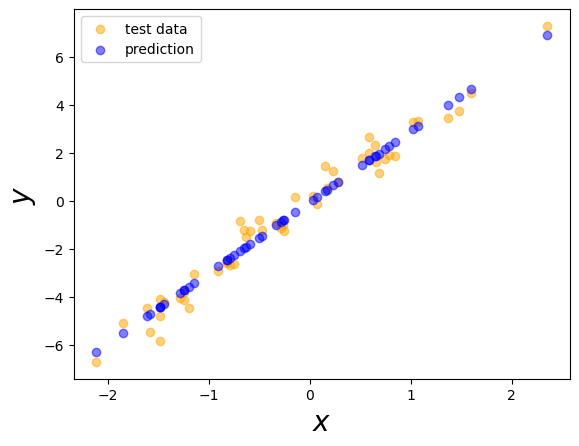

In [27]:
# 予測値
with torch.no_grad():
    pred = model(x_test)
    fig, ax =plt.subplots()
    ax.scatter(x_test, y_test, c='orange', alpha=0.5, label='test data')
    ax.scatter(x_test, pred, c='blue', alpha=0.5, label='prediction')
    ax.set_xlabel(r'$x$', fontsize=20)
    ax.set_ylabel(r'$y$', fontsize=20)
    ax.legend()
    plt.show()

In [26]:
# NN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1, bias=True)

        # 初期値の設定   
        nn.init.constant_(self.fc.weight, 0.0)
        nn.init.constant_(self.fc.bias, 0.0)
        
    def forward(self, x):
        x = self.fc(x)
        return x

# インスタンス生成
model = Net()

# 損失関数を定義
criterion = nn.MSELoss()

# 最適化手法を決定
optimizer = optim.SGD(model.parameters(), lr=0.01)

# エポック数
num_epoch = 1000
train_loss_list = []
for epoch in range(num_epoch):
    # 訓練モードに変更
    model.train()
    # 勾配初期化
    optimizer.zero_grad()
    # 予測
    output = model(x_train)
    # 損失関数を計算
    loss = criterion(output, y_train)
    # 勾配を計算
    loss.backward()
    # パラメータ更新
    optimizer.step()

    # lossを記録
    if (epoch%5==0):
        train_loss_list.append(loss.detach().item())
        print(f'【EPOCH {epoch}】 loss : {loss.detach().item():.5f}')

【EPOCH 0】 loss : 8.13115
【EPOCH 5】 loss : 6.82702
【EPOCH 10】 loss : 5.74066
【EPOCH 15】 loss : 4.83559
【EPOCH 20】 loss : 4.08145
【EPOCH 25】 loss : 3.45298
【EPOCH 30】 loss : 2.92918
【EPOCH 35】 loss : 2.49256
【EPOCH 40】 loss : 2.12857
【EPOCH 45】 loss : 1.82508
【EPOCH 50】 loss : 1.57201
【EPOCH 55】 loss : 1.36096
【EPOCH 60】 loss : 1.18493
【EPOCH 65】 loss : 1.03809
【EPOCH 70】 loss : 0.91559
【EPOCH 75】 loss : 0.81338
【EPOCH 80】 loss : 0.72810
【EPOCH 85】 loss : 0.65693
【EPOCH 90】 loss : 0.59753
【EPOCH 95】 loss : 0.54795
【EPOCH 100】 loss : 0.50657
【EPOCH 105】 loss : 0.47202
【EPOCH 110】 loss : 0.44317
【EPOCH 115】 loss : 0.41908
【EPOCH 120】 loss : 0.39897
【EPOCH 125】 loss : 0.38217
【EPOCH 130】 loss : 0.36814
【EPOCH 135】 loss : 0.35642
【EPOCH 140】 loss : 0.34663
【EPOCH 145】 loss : 0.33845
【EPOCH 150】 loss : 0.33162
【EPOCH 155】 loss : 0.32591
【EPOCH 160】 loss : 0.32113
【EPOCH 165】 loss : 0.31715
【EPOCH 170】 loss : 0.31382
【EPOCH 175】 loss : 0.31103
【EPOCH 180】 loss : 0.30870
【EPOCH 185】 loss : 0.30